##stock price prediction model

In [30]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()
from datetime import datetime
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)
for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]
for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)

yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [31]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,183.242749,184.818805,181.845458,183.378287,183.092660,5.902593e+07
std,9.519140,9.638634,9.507283,9.646496,9.611641,2.174985e+07
min,165.350006,166.399994,164.080002,165.000000,165.000000,2.404830e+07
25%,175.244995,177.025002,173.660004,175.280006,175.037872,4.670805e+07
50%,183.550003,185.089996,181.919998,183.860001,183.395981,5.306800e+07
75%,190.699997,191.934998,189.544998,190.684998,190.343521,6.557715e+07
max,214.740005,220.199997,212.720001,216.669998,216.669998,1.981343e+08


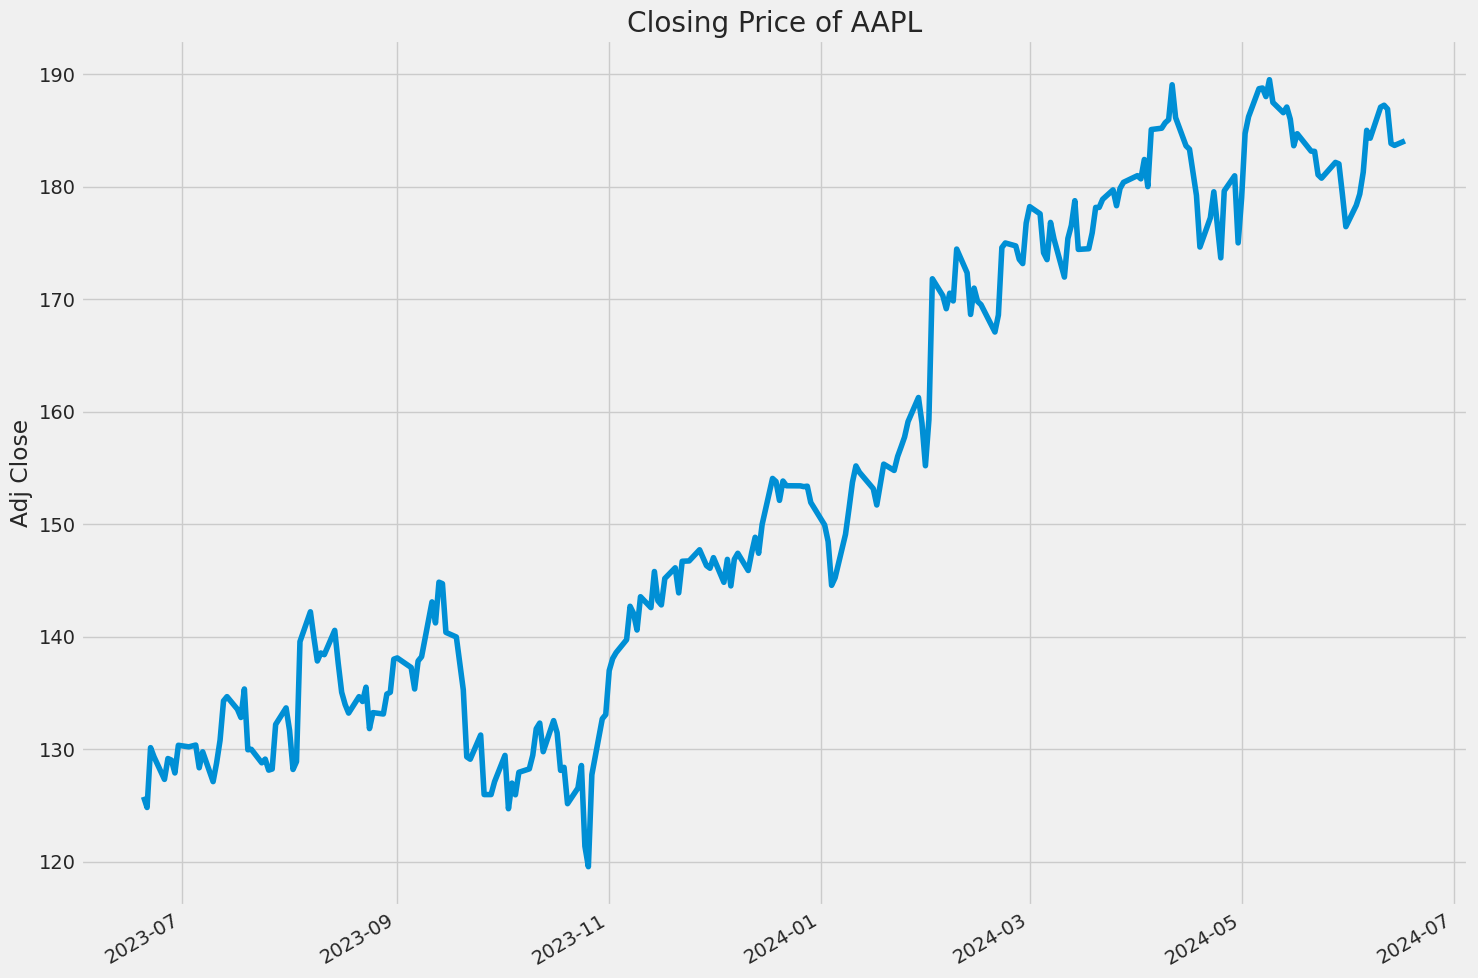

In [32]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)
company['Adj Close'].plot()
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.title(f"Closing Price of {tech_list[0]}")
plt.tight_layout()

In [33]:
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.433822,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.500643,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.639424,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.771556,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.751301,394024400
...,...,...,...,...,...,...
2024-06-11,193.649994,207.160004,193.630005,207.149994,207.149994,172373300
2024-06-12,207.369995,220.199997,206.899994,213.070007,213.070007,198134300
2024-06-13,214.740005,216.750000,211.600006,214.240005,214.240005,97862700


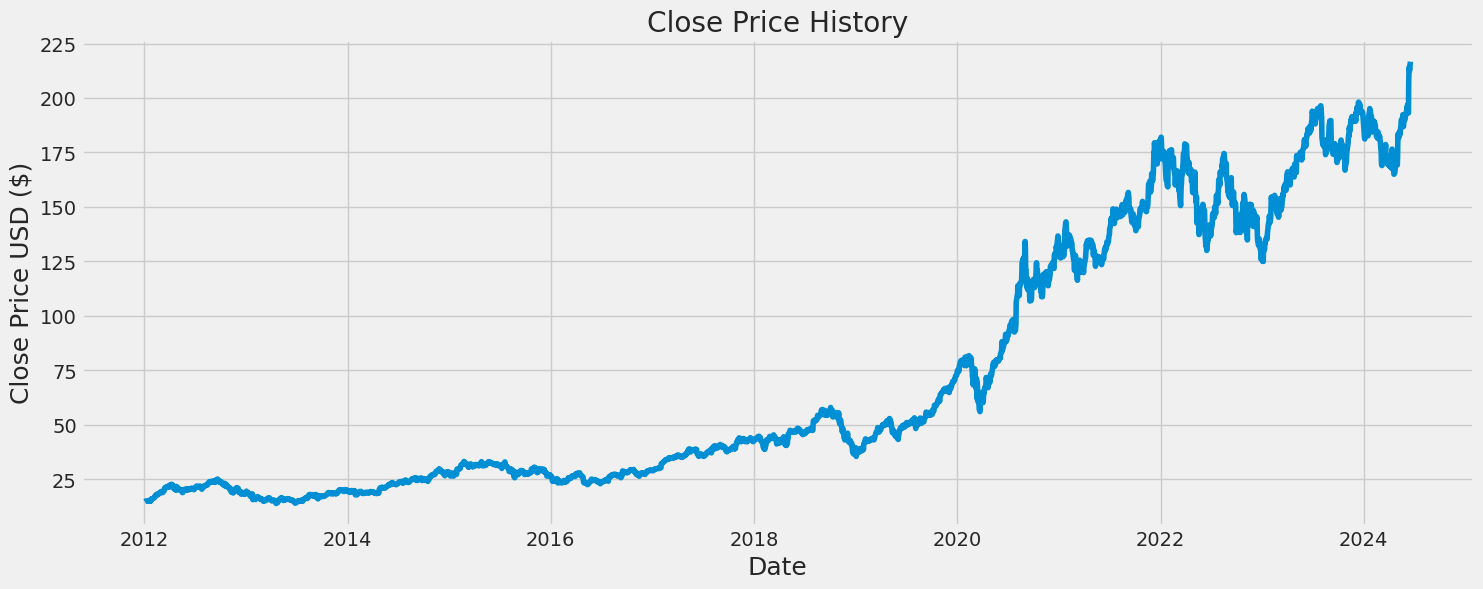

In [34]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [35]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len

2978

In [36]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00364679],
       [0.00403613],
       [0.00484476],
       ...,
       [0.98801321],
       [0.97938072],
       [1.        ]])

In [37]:
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.00364679, 0.00403613, 0.00484476, 0.00561464, 0.0054966 ,
       0.00576263, 0.00564107, 0.0054367 , 0.00515835, 0.00601984,
       0.00679677, 0.00655717, 0.00524467, 0.00649727, 0.00526406,
       0.0098886 , 0.00953098, 0.00999783, 0.0110073 , 0.01161862,
       0.01156753, 0.01137903, 0.01218238, 0.01293816, 0.01379437,
       0.01517733, 0.01808242, 0.01812647, 0.01974374, 0.02095228,
       0.01887521, 0.01967503, 0.01965918, 0.02190186, 0.02158299,
       0.02217316, 0.02323373, 0.02382391, 0.02552398, 0.02676248,
       0.02712011, 0.0272452 , 0.0251276 , 0.02461669, 0.02469245,
       0.02668321, 0.02724344, 0.0284467 , 0.03128309, 0.03506729,
       0.03435907, 0.03436083, 0.03709681, 0.03795301, 0.03734344,
       0.03678674, 0.03620713, 0.0381327 , 0.03945401, 0.04000719])]
[0.03864008132174998]

[array([0.00364679, 0.00403613, 0.00484476, 0.00561464, 0.0054966 ,
       0.00576263, 0.00564107, 0.0054367 , 0.00515835, 0.00601984,
       0.00679677, 0.00655717, 0.00

In [49]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=3)

Epoch 1/3
2918/2918 [==============================] - 158s 53ms/step - loss: 0.0010
Epoch 2/3
2918/2918 [==============================] - 153s 53ms/step - loss: 4.6223e-04
Epoch 3/3
2918/2918 [==============================] - 156s 53ms/step - loss: 4.3720e-04


In [50]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 1s 35ms/step


4.513183298687843

<ipython-input-51-eca9fd937580>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


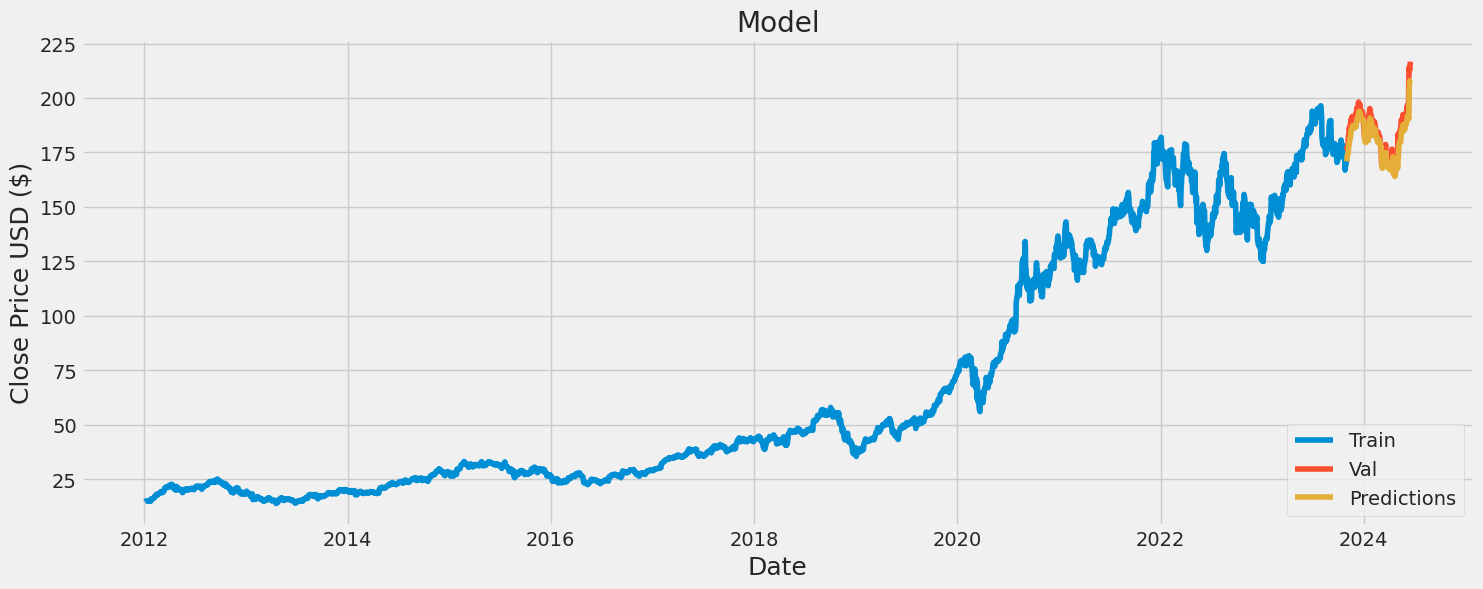

In [51]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [60]:
valid

,Close,Predictions
Date,,
2023-11-02,177.570007,170.891953
2023-11-03,176.649994,173.804565
2023-11-06,179.229996,174.262802
2023-11-07,181.820007,175.595627
2023-11-08,182.889999,177.614502
...,...,...
2024-06-11,207.149994,190.446808
2024-06-12,213.070007,198.090118
2024-06-13,214.240005,205.048859


## SENITIMENT SCORE PREDICTOR

In [52]:
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup
import pandas as pd



In [53]:
def get_news(ticker):
    finviz_url = 'https://finviz.com/quote.ashx?t='
    url = finviz_url + ticker
    req = Request(url=url, headers={'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:20.0) Gecko/20100101 Firefox/20.0'})
    response = urlopen(req)
    html = response.read()
    soup = BeautifulSoup(html, 'html.parser')
    news_table = soup.find(id='news-table')
    return news_table



In [54]:

def parse_news(news_table):
    parsed_news = []

    for x in news_table.findAll('tr'):
        text = x.a.get_text() if x.a else ''
        date_scrape = x.td.text.split() if x.td else []


        date = ''
        time = ''
        if len(date_scrape) == 1:
            time = date_scrape[0]
        elif len(date_scrape) >= 2:
            date = date_scrape[0]
            time = date_scrape[1]
        parsed_news.append([date, time, text])
    columns = ['date', 'time', 'headline']
    parsed_news_df = pd.DataFrame(parsed_news, columns=columns)
    parsed_news_df['datetime'] = pd.to_datetime(parsed_news_df['date'] + ' ' + parsed_news_df['time'], errors='coerce')
    return parsed_news_df

In [55]:
ticker = 'AAPL'
news_table = get_news(ticker)

if news_table:
    parsed_news_df = parse_news(news_table)
    print(parsed_news_df.head())
else:
    print("No news found for the ticker.")

    date     time                                           headline datetime
0  Today  09:20AM   Drug Names: The machinations behind the monikers      NaT
1         09:17AM  May retail sales, Nvidia, Boeing CEO testifies...      NaT
2         09:03AM                 Microsoft AI PCs take aim at Apple      NaT
3         08:30AM  Ambient commerce: what is it and why does it m...      NaT
4         08:15AM        Did Apple Just Become the AI Stock to Beat?      NaT


<ipython-input-54-045abc3a532d>:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  parsed_news_df['datetime'] = pd.to_datetime(parsed_news_df['date'] + ' ' + parsed_news_df['time'], errors='coerce')


In [56]:
def predict_sentiment(headline):
    # Instantiate the sentiment intensity analyzer
    vader = SentimentIntensityAnalyzer()

    # Get polarity score for the headline
    sentiment_score = vader.polarity_scores(headline)['compound']

    # Classify sentiment based on threshold (positive if compound score >= 0, else negative)
    if sentiment_score >= 0:
        return 'Positive'
    else:
        return 'Negative'
news_table = get_news(ticker)

if news_table:
    parsed_news_df = parse_news(news_table)

    # Example of predicting sentiment for each headline
    for headline in parsed_news_df['headline']:
        sentiment = predict_sentiment(headline)
        print(f"Heading: {headline}")
        print(f"Predicted Sentiment: {sentiment}")
else:
    print("No news found for the ticker.")


<ipython-input-54-045abc3a532d>:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  parsed_news_df['datetime'] = pd.to_datetime(parsed_news_df['date'] + ' ' + parsed_news_df['time'], errors='coerce')


Heading: Drug Names: The machinations behind the monikers
Predicted Sentiment: Positive
Heading: May retail sales, Nvidia, Boeing CEO testifies: 3 Things
Predicted Sentiment: Positive
Heading: Microsoft AI PCs take aim at Apple
Predicted Sentiment: Positive
Heading: Ambient commerce: what is it and why does it matter?
Predicted Sentiment: Positive
Heading: Did Apple Just Become the AI Stock to Beat?
Predicted Sentiment: Positive
Heading: 
Predicted Sentiment: Positive
Heading: Here's how AI is transforming Disney, Spotify, and TikTok
Predicted Sentiment: Positive
Heading: Huawei Weighs App Store Fees as It Surpasses iPhone in China
Predicted Sentiment: Positive
Heading: Apple Scraps Its Buy Now, Pay Later Product. Forget Payments, AI Is the Focus.
Predicted Sentiment: Negative
Heading: Nvidia Insiders Cash In on Rally as Share Sales Top $700 Million
Predicted Sentiment: Positive
Heading: 3 Top Stocks I'd Buy Today and Hold Forever Without Any Hesitation
Predicted Sentiment: Positive
He

## HYBRID MODEL

In [59]:
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import numpy as np
import yfinance as yf
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

nltk.download('vader_lexicon')

def get_news(ticker):
    finviz_url = 'https://finviz.com/quote.ashx?t='
    url = finviz_url + ticker
    req = Request(url=url, headers={'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:20.0) Gecko/20100101 Firefox/20.0'})
    response = urlopen(req)

    html = response.read()

    soup = BeautifulSoup(html, 'html.parser')

    news_table = soup.find(id='news-table')

    return news_table

def parse_news(news_table):
    parsed_news = []

    for x in news_table.findAll('tr'):
        text = x.a.get_text() if x.a else ''
        date_scrape = x.td.text.split() if x.td else []

        date = ''
        time = ''

        if len(date_scrape) == 1:
            time = date_scrape[0]
        elif len(date_scrape) >= 2:
            date = date_scrape[0]
            time = date_scrape[1]

        parsed_news.append([date, time, text])

    columns = ['date', 'time', 'headline']
    parsed_news_df = pd.DataFrame(parsed_news, columns=columns)
    parsed_news_df['datetime'] = pd.to_datetime(parsed_news_df['date'] + ' ' + parsed_news_df['time'], format='%b-%d-%y %I:%M%p', errors='coerce')

    return parsed_news_df

def predict_sentiment(headline):
    vader = SentimentIntensityAnalyzer()
    sentiment_score = vader.polarity_scores(headline)['compound']
    return sentiment_score

def fetch_stock_data(ticker):
    end = datetime.now()
    start = datetime(end.year - 1, end.month, end.day)
    stock_data = yf.download(ticker, start, end)
    return stock_data

def prepare_lstm_data(stock_data):
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(stock_data['Close'].values.reshape(-1,1))

    training_data_len = int(np.ceil( len(scaled_data) * .95 ))

    train_data = scaled_data[0:int(training_data_len), :]

    x_train = []
    y_train = []

    for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0])

    x_train, y_train = np.array(x_train), np.array(y_train)

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

    return x_train, y_train, scaler, training_data_len

def create_lstm_model(x_train):
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def main(ticker):

    news_table = get_news(ticker)

    if news_table:
        parsed_news_df = parse_news(news_table)
        parsed_news_df['sentiment_score'] = parsed_news_df['headline'].apply(predict_sentiment)
        stock_data = fetch_stock_data(ticker)
        x_train, y_train, scaler, training_data_len = prepare_lstm_data(stock_data)
        model = create_lstm_model(x_train)
        model.fit(x_train, y_train, batch_size=1, epochs=3)
        print("News Headlines and Sentiment Scores:")
        print(parsed_news_df[['headline', 'sentiment_score']])


    else:
        print("No news found for the ticker.")
ticker = 'AAPL'
main(ticker)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[*********************100%%**********************]  1 of 1 completed


Epoch 1/3
180/180 [==============================] - 13s 50ms/step - loss: 0.0110
Epoch 2/3
180/180 [==============================] - 12s 67ms/step - loss: 0.0059
Epoch 3/3
180/180 [==============================] - 11s 63ms/step - loss: 0.0042
News Headlines and Sentiment Scores:
                                              headline  sentiment_score
0     Drug Names: The machinations behind the monikers           0.0000
1    May retail sales, Nvidia, Boeing CEO testifies...           0.0000
2                   Microsoft AI PCs take aim at Apple           0.0000
3    Ambient commerce: what is it and why does it m...           0.0258
4          Did Apple Just Become the AI Stock to Beat?           0.0000
..                                                 ...              ...
98                  Is It Too Late to Buy Apple Stock?           0.0000
99   The Big AI Question: Are You Ready to Pay for It?           0.2732
100  Investors started to do the math on Apple's AI...           0.20